In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/sedroc/Bachelor/FEPCEU')
from enhanced_experiment import EnhancedTimeSeriesExperiment
from models.arima import Arima
from models.baseline import Baseline
from models.chronos import Chronos
from models.lgbm import LGBM
from models.neuralproph import Neuralprophet

from data.data_retriever import Dataretreiver

/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [3]:
data = Dataretreiver(reduce='pearson', debug=True)
df = data.combined

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Top 10 most correlated with elspot price:
sun_area_6: correlation = -0.2910
sun_area_11: correlation = -0.2882
sun_area_1: correlation = -0.2874
sun_area_16: correlation = -0.2839
sun_area_7: correlation = -0.2830
sun_area_2: correlation = -0.2830
sun_area_3: correlation = -0.2828
sun_area_21: correlation = -0.2828
sun_area_8: correlation = -0.2814
sun_area_26: correlation = -0.2802
Top 10 most correlated with elspot price:
wind_area_12: correlation = -0.4016
wind_area_13: correlation = -0.3981
wind_area_17: correlation = -0.3916
wind_area_16: correlation = -0.3907
wind_area_18: correlation = -0.3902
wind_area_27: correlation = -0.3849
wind_area_7: correlation = -0.3843
wind_area_11: correlation = -0.3812
wind_area_6: correlation = -0.3740
wind_area_22: correlat

In [5]:
# Define models
models = {
    #'BASELINE': Baseline(),
    'LGBM': LGBM(),
    #'ARIMA': Arima(order=[1,1,1], seasonal_order=[1,1,1,24]),
    #'CHRONOS': Chronos(),
    #'NEURALPROPHET': Neuralprophet()
}

Identified area columns: {'sun': {6: 'sun_area_6', 11: 'sun_area_11', 1: 'sun_area_1', 16: 'sun_area_16', 7: 'sun_area_7', 2: 'sun_area_2', 3: 'sun_area_3', 21: 'sun_area_21', 8: 'sun_area_8', 26: 'sun_area_26'}, 'wind': {12: 'wind_area_12', 13: 'wind_area_13', 17: 'wind_area_17', 16: 'wind_area_16', 18: 'wind_area_18', 27: 'wind_area_27', 7: 'wind_area_7', 11: 'wind_area_11', 6: 'wind_area_6', 22: 'wind_area_22'}, 'temp': {13: 'temp_area_13', 12: 'temp_area_12', 39: 'temp_area_39', 40: 'temp_area_40', 38: 'temp_area_38', 18: 'temp_area_18', 16: 'temp_area_16', 19: 'temp_area_19', 35: 'temp_area_35', 33: 'temp_area_33'}}
Cross-validation splits:
Split 1: Train end = 2024-06-29 20:00:00 (index 4340), Test end = 2024-07-07 19:00:00 (index 4531)

Running experiment for feature group: all_areas
Using columns: ['sun_area_6', 'sun_area_11', 'sun_area_1', 'sun_area_16', 'sun_area_7', 'sun_area_2', 'sun_area_3', 'sun_area_21', 'sun_area_8', 'sun_area_26', 'wind_area_12', 'wind_area_13', 'wind_

Best trial: 13. Best value: 177.388: 100%|██████████| 20/20 [01:23<00:00,  4.18s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 1000, 'max_depth': 3, 'min_data_in_leaf': 26, 'learning_rate': 0.36325926928797825, 'feature_fraction': 0.9885068296079256, 'max_bin': 242, 'reg_alpha': 0.8320869084785918, 'reg_lambda': 0.253646264765973}
  Backtesting metric: 177.38816910601443


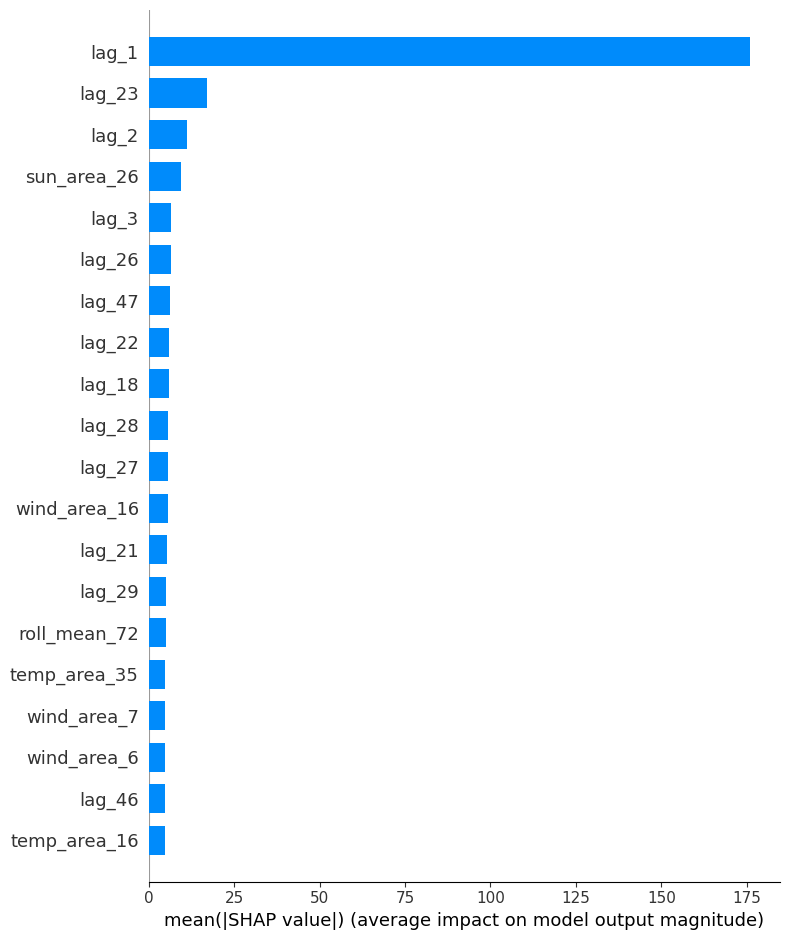

In [17]:
# Initialize the experiment
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=1
)


# Define custom combinations of different measurement types with different areas
custom_combinations = [
    # Combination 1: temp area 1, wind area 1, sun areas 1,2,3
    #{
    #    'temp': {1},
    #    'wind': {7},
    #    'sun': {13}
    #},
    # Combination 2: temp areas 1,2, wind area 1, sun area 1
    #{
    #    'temp': {1, 2},
    #    'wind': {1},
    #    'sun': {1}
    #},
    # Add more combinations as needed...
]

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    custom_feature_combinations=custom_combinations,
    add_all_columns=True,
    add_base_columns=False
)

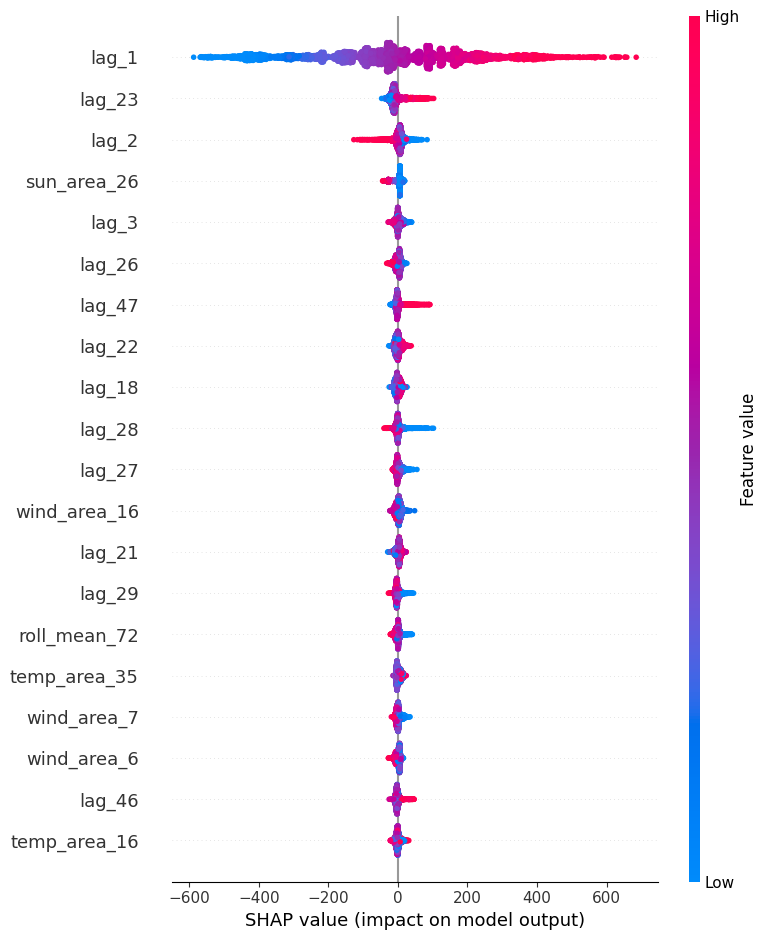

.values =
array([[-1.92238489e+01, -1.54409972e-01,  2.24395536e+00, ...,
        -1.38574807e-01,  6.95227321e+00, -5.44770568e+00],
       [-1.83786147e+01, -7.17247619e-01,  9.16509589e-01, ...,
         6.05076463e-02,  5.83397506e+00, -6.27966737e+00],
       [-8.70412462e+01,  2.36764243e+00, -7.53392358e-01, ...,
        -6.50973066e-02,  7.48432241e+00, -5.86779927e+00],
       ...,
       [-3.06100437e+02,  3.53443990e+01,  2.56201308e+01, ...,
        -5.00238668e+00,  7.41411085e+00,  1.08257375e-01],
       [ 5.33481478e+01,  1.58394000e+01,  8.61323789e+00, ...,
        -3.11150723e+00,  7.72401521e+00, -7.34251133e-01],
       [ 2.82023537e+02,  5.78561172e+00,  2.92619168e+01, ...,
        -5.68737017e+00,  1.11400179e+01, -5.07006965e+00]])

.base_values =
array([470.62137722, 470.62137722, 470.62137722, ..., 470.62137722,
       470.62137722, 470.62137722])

.data =
array([[ 4.33290009e+02,  4.84579987e+02,  5.02549988e+02, ...,
        -3.10000000e+00, -4.70000000e+00

In [22]:
import shap
shap.summary_plot(experiment.models['LGBM'].shap_values)
experiment.models['LGBM'].shap_values

WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning:

ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead




          LGBM
all_areas  N/A
Plotting SHAP summary plot for LGBM


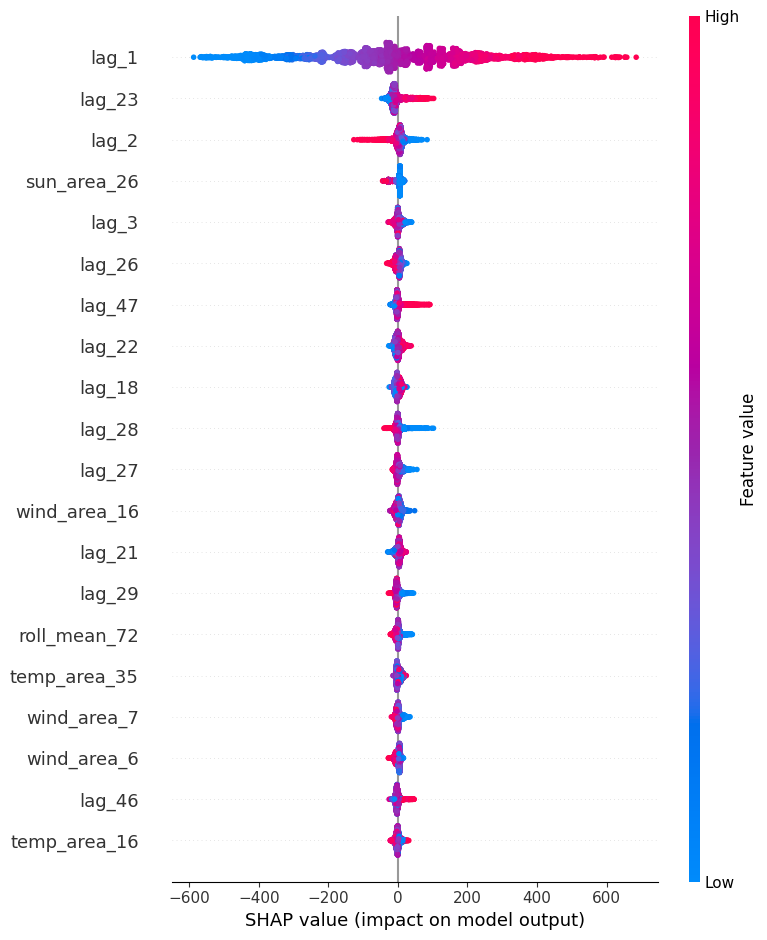

In [25]:
# Get a table of results
results_df = experiment.summarize_feature_group_results(metric='SHAP_values')
print(results_df)

# Plot the results
experiment.plot_feature_group_results(metric='SHAP_values')

In [14]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=2  # First CV fold
)